### Code for Predicting Downloads Status with views, likes and downloads
###### Produced by Yuqi Yang

In [202]:
import pandas as pd

# Read raw dataset from csv file
path_to_data = './data/Cln_web_scrap_sf.xlsx'
rawDF = pd.read_excel(path_to_data)

In [203]:
# Distribution of target feature
rawDF['Downloads'].value_counts()

Downloads
1.0       7
13.0      6
32.0      6
14.0      6
7.0       5
         ..
59.0      1
229.0     1
3294.0    1
3140.0    1
108.0     1
Name: count, Length: 144, dtype: int64

In [204]:
# Data scheme of the raw dataset (data type for each column)
rawDF = rawDF.drop(['Title', 'Date', 'Price'],axis=1)
rawDF.dropna(axis=0, inplace=True, subset=['Downloads'])
rawDF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 5 to 399
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Paid                    261 non-null    int64  
 1   Downloads               261 non-null    float64
 2   Views                   261 non-null    int64  
 3   Likes                   261 non-null    int64  
 4   Duration(Days)          261 non-null    int64  
 5   Avg_Downloads_per_year  261 non-null    float64
 6   Avg_Views_per_year      261 non-null    float64
 7   Avg_Likes_per_year      261 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 18.4 KB


In [205]:
# Statistics for the numeric attributes in the raw dataset
rawDF.describe()

,Paid,Downloads,Views,Likes,Duration(Days),Avg_Downloads_per_year,Avg_Views_per_year,Avg_Likes_per_year
count,261.0,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,0.0,295.931034,1696.237548,34.314176,1269.498084,92.371644,508.301080,13.548895
std,0.0,959.878876,5194.581566,131.964626,811.218521,266.462235,1381.144292,45.920161
min,0.0,0.000000,3.000000,0.000000,6.000000,0.000000,6.144781,0.000000
25%,0.0,17.000000,112.000000,2.000000,598.000000,5.916920,43.267477,0.494803
50%,0.0,45.000000,297.000000,6.000000,1213.000000,18.507042,130.967239,2.388222
75%,0.0,126.000000,962.000000,16.000000,1920.000000,60.833333,370.748031,8.434874
max,0.0,9505.000000,55804.000000,1700.000000,3078.000000,2316.432990,13619.714286,573.571429


In [206]:
# Correlation between the various columns in the dataset - numerical view
rawDF.corr()

,Paid,Downloads,Views,Likes,Duration(Days),Avg_Downloads_per_year,Avg_Views_per_year,Avg_Likes_per_year
Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Downloads,NaN,1.000000,0.935890,0.920287,0.177509,0.802707,0.731416,0.523726
Views,NaN,0.935890,1.000000,0.934800,0.223524,0.695999,0.732531,0.500281
Likes,NaN,0.920287,0.934800,1.000000,0.151921,0.680471,0.685258,0.544839
Duration(Days),NaN,0.177509,0.223524,0.151921,1.000000,-0.042961,-0.023439,-0.125998
Avg_Downloads_per_year,NaN,0.802707,0.695999,0.680471,-0.042961,1.000000,0.942570,0.839578
Avg_Views_per_year,NaN,0.731416,0.732531,0.685258,-0.023439,0.942570,1.000000,0.909461
Avg_Likes_per_year,NaN,0.523726,0.500281,0.544839,-0.125998,0.839578,0.909461,1.000000


<Axes: >

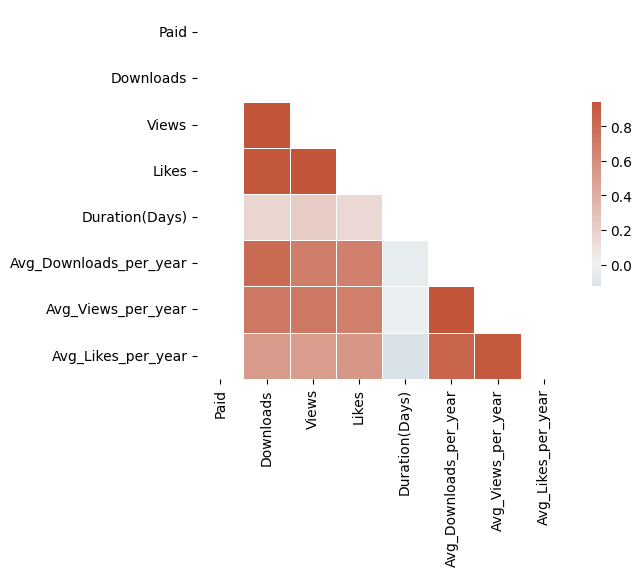

In [207]:
# Correlation between the various columns in the dataset - heatmap view
import seaborn as sb
import numpy as np

# Get correlation
corr = rawDF.corr()

# Create colour palette for chart
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, yticklabels=True, linewidths=.5, cbar_kws={"shrink": .5})

In [208]:
rawDF = rawDF.drop(['Duration(Days)', 'Paid'],axis=1)

###Univariate Analysis

In [209]:
# Calculate skewness for each column
# For skewness, if the value is greater than + 1.0, the distribution is right skewed. If the value is less than -1.0, the distribution is left skewed. 
rawDF.skew()

Downloads                 5.974360
Views                     6.450602
Likes                     9.084826
Avg_Downloads_per_year    5.904313
Avg_Views_per_year        6.120908
Avg_Likes_per_year        8.525012
dtype: float64

In [210]:
# Calculate kurtosis for each column
# For kurtosis, if the value is greater than + 1.0, the distribution is leptokurtik. If the value is less than -1.0, the distribution is platykurtik.
rawDF.kurtosis()

Downloads                  43.135264
Views                      52.753593
Likes                     102.670501
Avg_Downloads_per_year     39.525860
Avg_Views_per_year         44.910577
Avg_Likes_per_year         91.313722
dtype: float64

In [211]:
rawDF = rawDF.drop(['Avg_Downloads_per_year', 'Avg_Views_per_year', 'Avg_Likes_per_year'],axis=1)

In [212]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [213]:
raw_data_x = rawDF.drop(columns=['Downloads'])
raw_data_y = rawDF['Downloads']

In [214]:
# Min-Max normalization 
scaler = MinMaxScaler()
scaler.fit(raw_data_x)
t_raw_data_x = scaler.transform(raw_data_x)

In [215]:
# split train and validation data 
X_train, X_test, y_train, y_test = train_test_split(t_raw_data_x, raw_data_y, test_size=0.25, random_state=0)

In [216]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (195, 2)
y_train: (195,)
X_test: (66, 2)
y_test: (66,)


### Initialize Sequential Model

In [217]:
basic_model = Sequential()

### Input Layer

In [218]:
basic_model.add(Dense(units=16, activation='relu', input_shape=(2,)))

c:\Users\yyang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Output Layer

In [219]:
basic_model.add(Dense(1, activation='sigmoid'))

### Optimizer

In [220]:
adam = keras.optimizers.Adam(learning_rate=0.001)

### Compile Model

In [221]:
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [222]:
basic_model.fit(X_train, y_train, epochs=20)

Epoch 1/20


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0295 - loss: 30.0442     
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0192 - loss: 40.5625      
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0259 - loss: 11.5346     
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0185 - loss: 16.5204     
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0472 - loss: 0.7330  
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0342 - loss: -14.5327 
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0289 - loss: -23.9717 
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0225 - loss: -26.1968     
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0243 - loss: -34.6099     
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0323 - loss: -39.9209 
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0269 - loss: -44.3875 
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc

In [223]:
# Loss Function
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0115 - loss: -124.0537      
[-102.93486785888672, 0.01515151560306549]
Loss =  -102.93486785888672
Accuracy =  0.01515151560306549
